In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<font size='5'>IRIS</font>

In [3]:
irisData = pd.read_csv(
    "iris.data",
    names=["sepal-length", "sepal-width", "petal-length", "petal-width", "class"],
)
irisData.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
irisAttributes = irisData.loc[:, irisData.columns != "class"]
irisClasses = irisData.loc[:, irisData.columns == "class"]

<font size="4">Klasy</font>

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


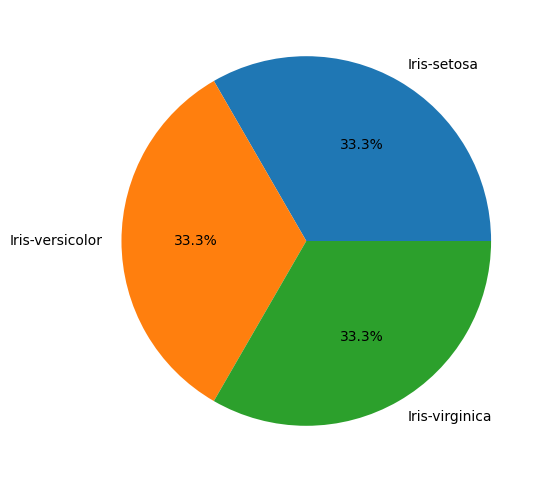

In [5]:
classesCounts = irisClasses.value_counts()

print(classesCounts)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor("white")
plt.pie(
    classesCounts, labels=classesCounts.index.get_level_values(0), autopct="%1.1f%%"
)
plt.show()

W zbiorze są 3 klasy. Każda z tych klas to podgatunek kwiatu iris.

<font size="4">Atrybuty</font>

In [6]:
irisAttributes.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

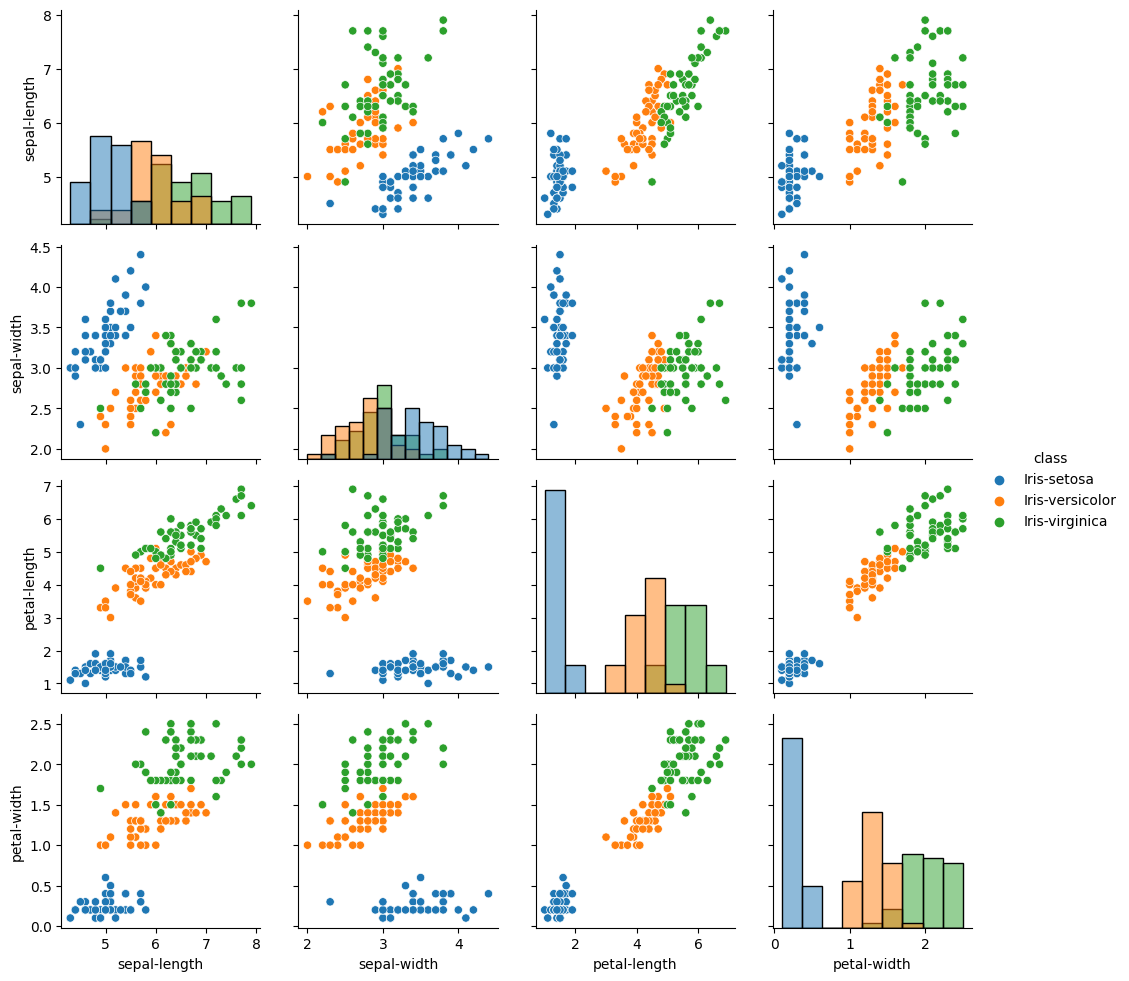

In [7]:
grid = sns.PairGrid(irisData, hue="class")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

Można zauważyć że podgatunek Iris-setosa znacznie się rożni od pozostałych co może wskazywać że jest on wizualnie łatwy do odróżnienia.

<font size="5">Wyrysowanie wykresu zależności długości/szerokości płatków IRIS a klasą (z kolorem)</font>

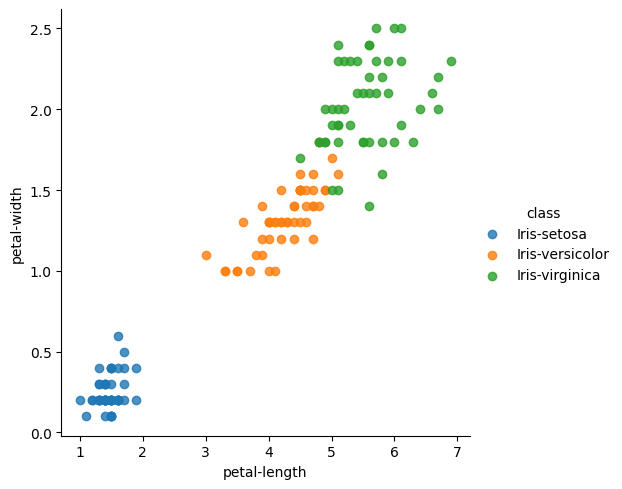

In [8]:
sns.lmplot(x="petal-length", y="petal-width", data=irisData, hue="class", fit_reg=False)

<font size="5">PCA - principal component analysis</font>\
<font>Standaryzacja danych, aby wszystkie atrybuty były w tej samej skali.</font>


In [9]:
standardizedAttributes = StandardScaler().fit_transform(irisAttributes)

pca = PCA(n_components=2)
pcAttributes = pca.fit_transform(standardizedAttributes)

pcAttributesData = pd.DataFrame(data=pcAttributes, columns=["pc-1", "pc-2"])
pcAttributesData = pd.concat([pcAttributesData, irisClasses], axis=1)

pcAttributesData.head()

pc-1      pc-2        class
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa

Wykonanie projekci na 2 główne składowe zachowuje około 96% wariacji zbioru.

In [10]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]
0.9580097536148198


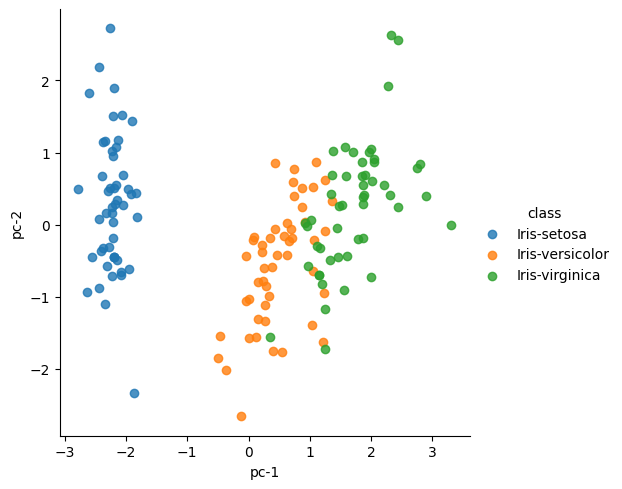

In [11]:
sns.lmplot(x="pc-1", y="pc-2", data=pcAttributesData, hue="class", fit_reg=False)

<font size="5">WINE</font>

In [12]:
wineData = pd.read_csv(
    "wine.data",
    names=[
        "class",
        "Alcohol",
        "Malic acid",
        "Ash",
        "Alcanity of ash",
        "Magnesium",
        "Total phenols",
        "Flavanoids",
        "Nonflavanoid phenosis",
        "Proanthocyanins",
        "Color intensity",
        "Hue",
        "OD280/OD315 of diluted wine",
        "Proline",
    ],
)

wineData = wineData[list(wineData.columns.values)[1:] + ["class"]]
wineData.head()

Alcohol  Malic acid   Ash  Alcanity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43             15.6        127           2.80   
1    13.20        1.78  2.14             11.2        100           2.65   
2    13.16        2.36  2.67             18.6        101           2.80   
3    14.37        1.95  2.50             16.8        113           3.85   
4    13.24        2.59  2.87             21.0        118           2.80   

   Flavanoids  Nonflavanoid phenosis  Proanthocyanins  Color intensity   Hue  \
0        3.06                   0.28             2.29             5.64  1.04   
1        2.76                   0.26             1.28             4.38  1.05   
2        3.24                   0.30             2.81             5.68  1.03   
3        3.49                   0.24             2.18             7.80  0.86   
4        2.69                   0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wine  Proline  class  
0                         3.92     1065      1  
1                         3.40     1050      1  
2                         3.17     1185      1  
3                         3.45     1480      1  
4                         2.93      735      1

<font size="4">Klasy</font>

class
1        59
2        71
3        48
dtype: int64


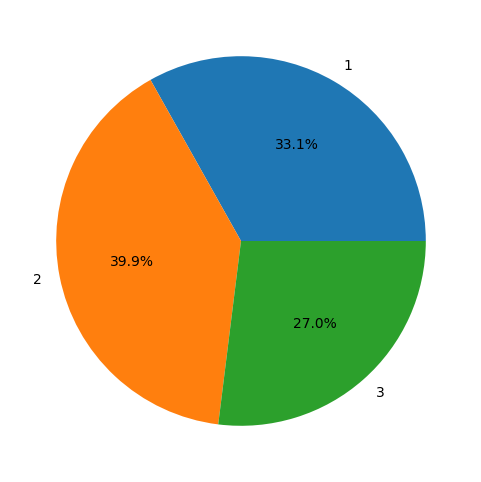

In [13]:
wineAttributes = wineData.loc[:, wineData.columns != "class"]
wineClasses = wineData.loc[:, wineData.columns == "class"]
wineClassesCount = wineClasses.value_counts().sort_index()

print(wineClassesCount)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor("white")
plt.pie(
    wineClassesCount,
    labels=wineClassesCount.index.get_level_values(0),
    autopct="%1.1f%%",
)
plt.show()

Zbiór WINE zawiera 3 rodzaje win. Z opisu zbioru wynika ,że są to wina z tego samego regionu Włoch ale z 3 różnych rodzaji winogron.

<font size="5">Atrybuty</font>\
Atrybuty przedstawiają różne własności chemiczne wina. Jest ich 13.

In [14]:
wineAttributes.describe()

Alcohol  Malic acid         Ash  Alcanity of ash   Magnesium  \
count  178.000000  178.000000  178.000000       178.000000  178.000000   
mean    13.000618    2.336348    2.366517        19.494944   99.741573   
std      0.811827    1.117146    0.274344         3.339564   14.282484   
min     11.030000    0.740000    1.360000        10.600000   70.000000   
25%     12.362500    1.602500    2.210000        17.200000   88.000000   
50%     13.050000    1.865000    2.360000        19.500000   98.000000   
75%     13.677500    3.082500    2.557500        21.500000  107.000000   
max     14.830000    5.800000    3.230000        30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenosis  Proanthocyanins  \
count     178.000000  178.000000             178.000000       178.000000   
mean        2.295112    2.029270               0.361854         1.590899   
std         0.625851    0.998859               0.124453         0.572359   
min         0.980000    0.340000               0.130000         0.410000   
25%         1.742500    1.205000               0.270000         1.250000   
50%         2.355000    2.135000               0.340000         1.555000   
75%         2.800000    2.875000               0.437500         1.950000   
max         3.880000    5.080000               0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wine      Proline  
count       178.000000  178.000000                   178.000000   178.000000  
mean          5.058090    0.957449                     2.611685   746.893258  
std           2.318286    0.228572                     0.709990   314.907474  
min           1.280000    0.480000                     1.270000   278.000000  
25%           3.220000    0.782500                     1.937500   500.500000  
50%           4.690000    0.965000                     2.780000   673.500000  
75%           6.200000    1.120000                     3.170000   985.000000  
max          13.000000    1.710000                     4.000000  1680.000000

Na przekątnej przedstawione są histogramy wartości poszczególnych atrybutów z podziałem na klasy.

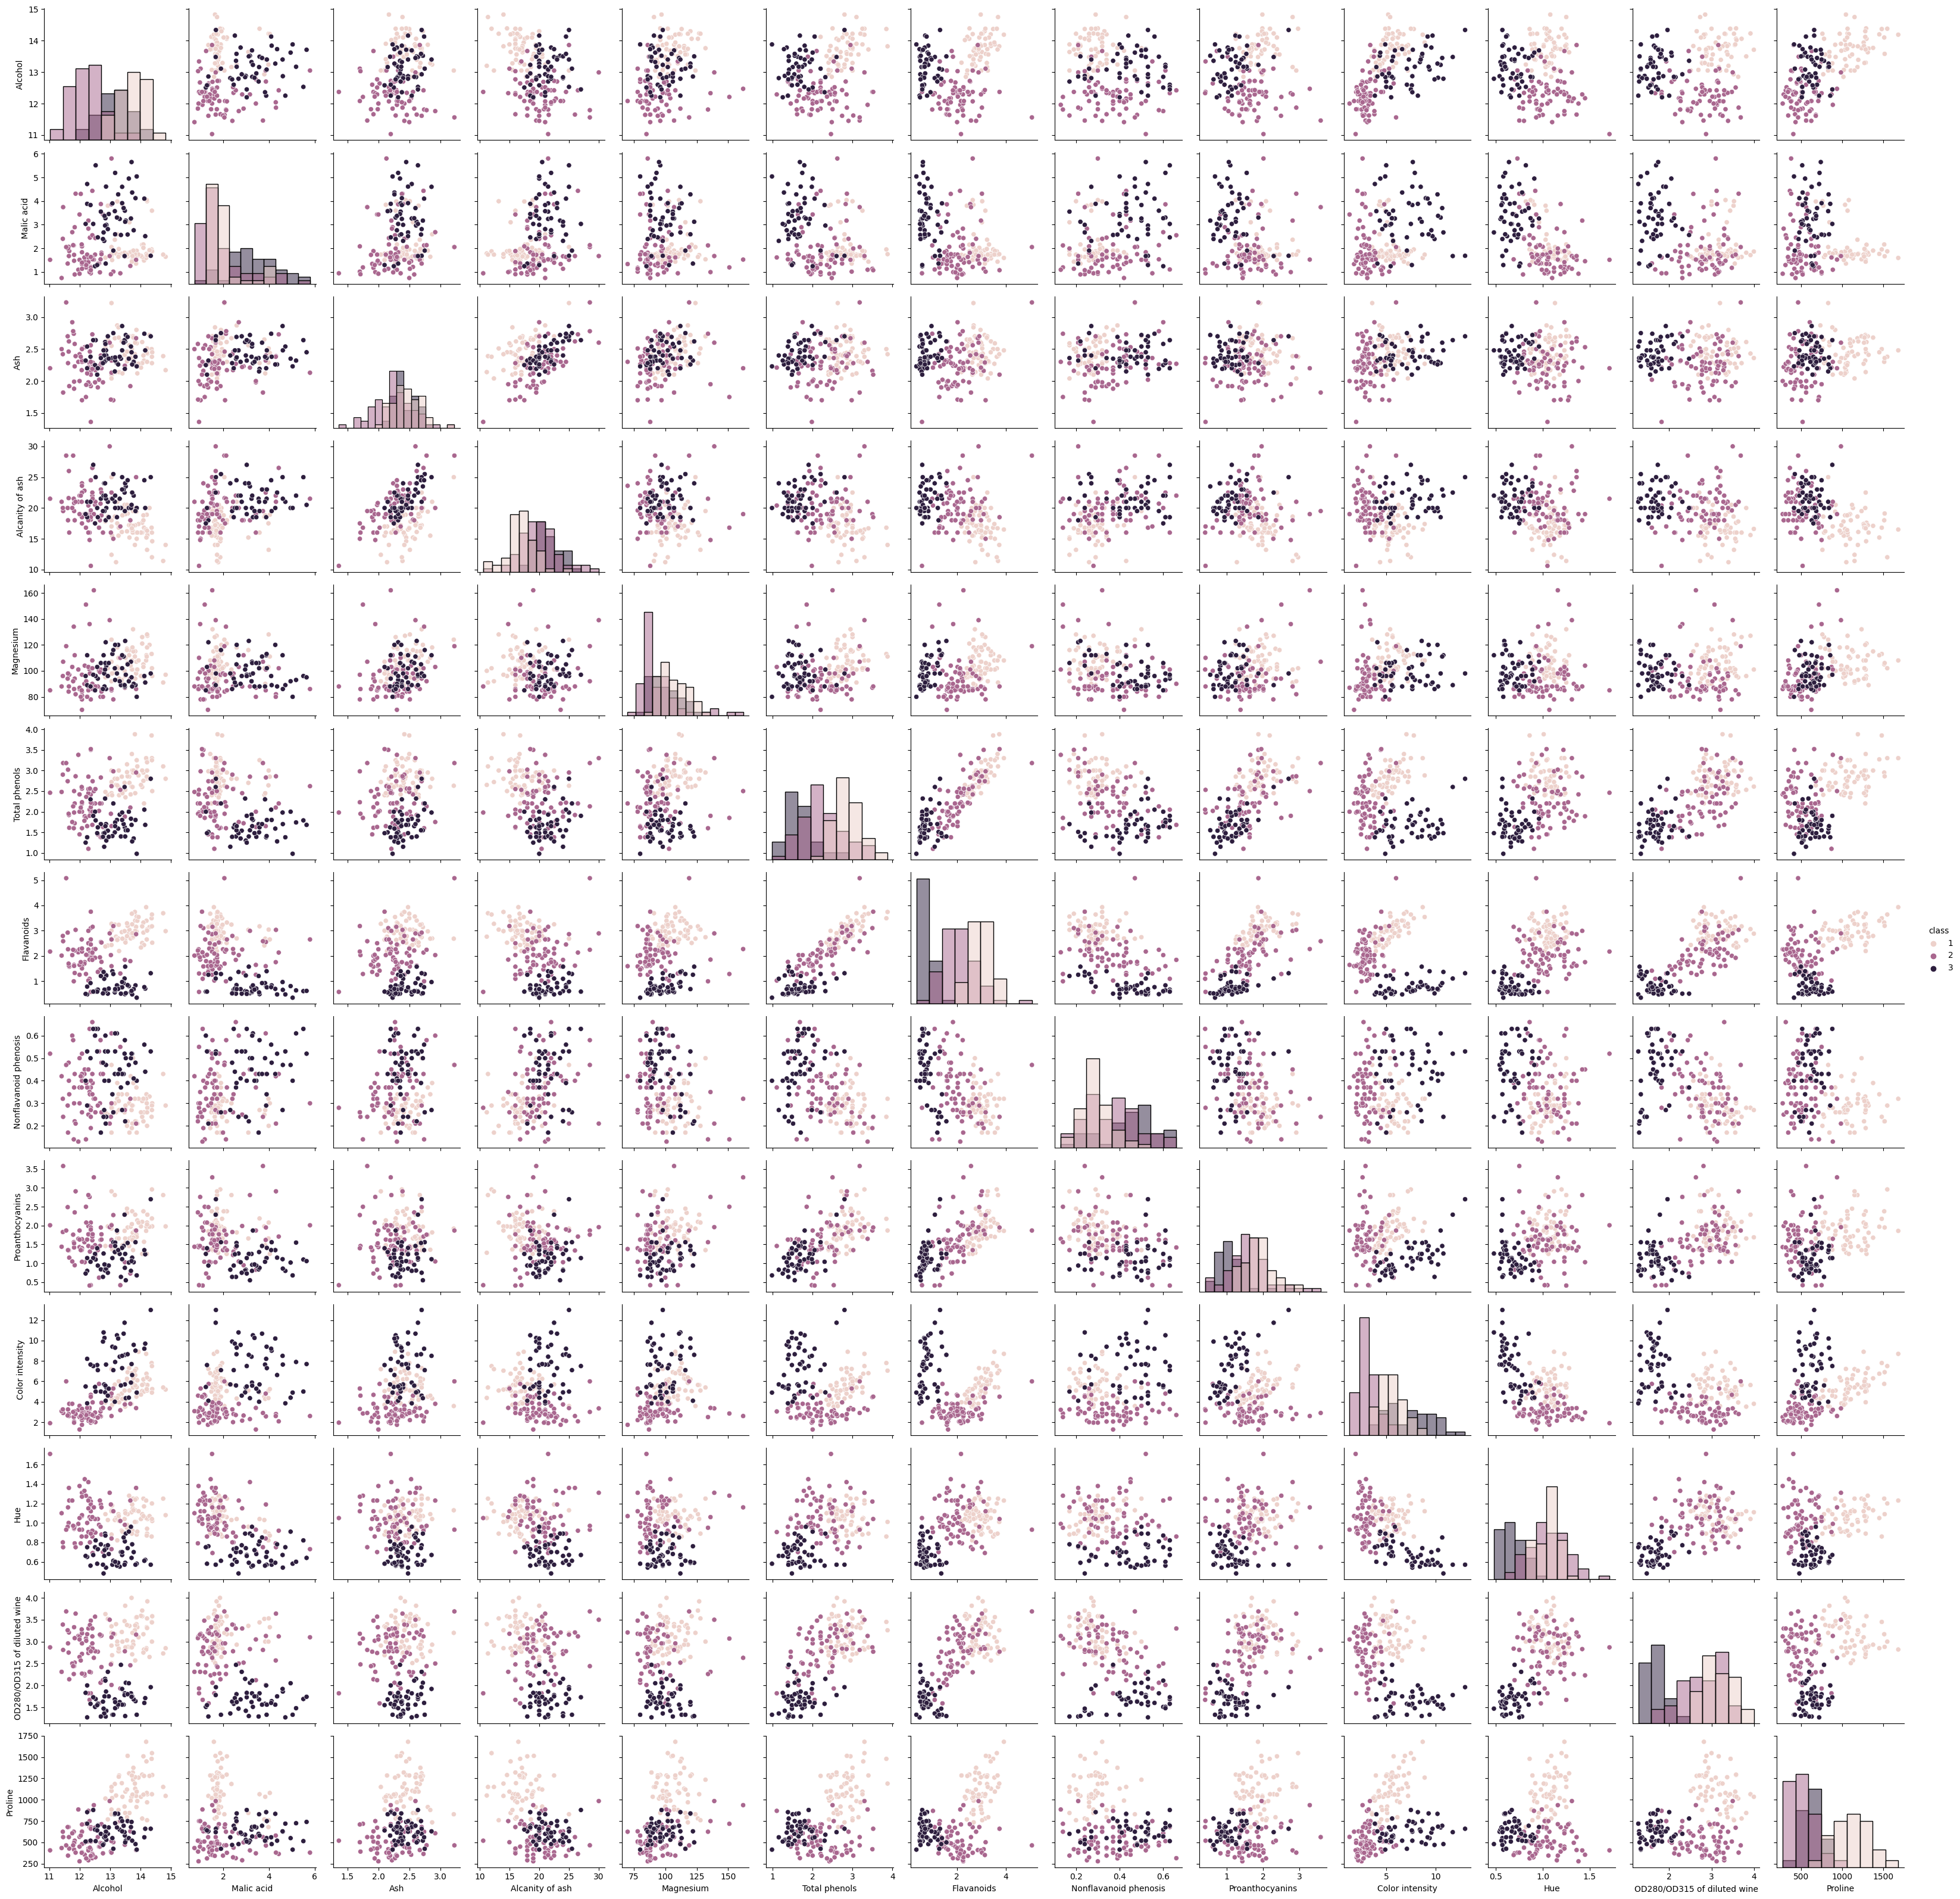

In [15]:
grid = sns.PairGrid(wineData, hue="class")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

<font size="4">Wykres zależności alkoholu/poliny</font>

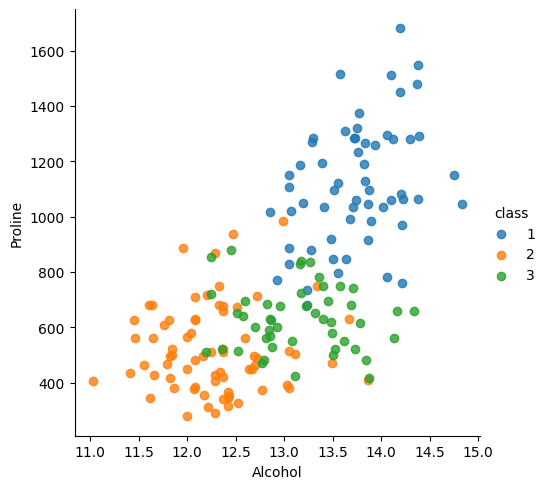

In [16]:
sns.lmplot(x="Alcohol", y="Proline", data=wineData, hue="class", fit_reg=False)

<font size="4">PCA</font>

In [17]:
standardizedAttributes = StandardScaler().fit_transform(wineAttributes)

pca = PCA(n_components=2)
pcAttributes = pca.fit_transform(standardizedAttributes)

pcAttributesData = pd.DataFrame(data=pcAttributes, columns=["pc-1", "pc-2"])
pcAttributesData = pd.concat([pcAttributesData, wineClasses], axis=1)

pcAttributesData.head()

pc-1      pc-2  class
0  3.316751 -1.443463      1
1  2.209465  0.333393      1
2  2.516740 -1.031151      1
3  3.757066 -2.756372      1
4  1.008908 -0.869831      1

In [18]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.36198848 0.1920749 ]
0.5540633835693534


Projekcja na 2 główne składowe zachowuje 55.4% wariancji zbioru

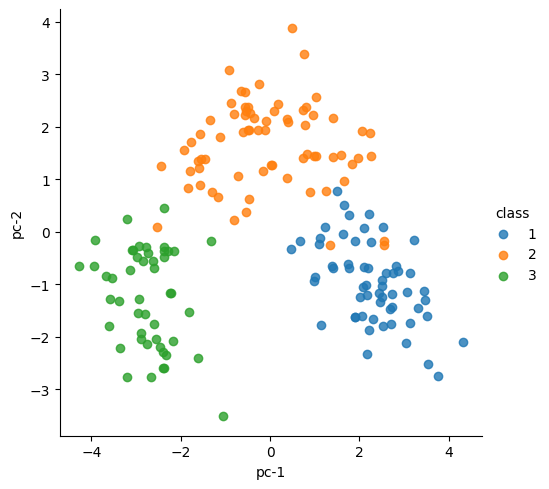

In [19]:
sns.lmplot(x="pc-1", y="pc-2", data=pcAttributesData, hue="class", fit_reg=False)

Projekca na 3 główne składowe 

In [20]:
standardizedAttributes = StandardScaler().fit_transform(wineAttributes)

pca = PCA(n_components=3)
pcAttributes = pca.fit_transform(standardizedAttributes)

pcAttributesData = pd.DataFrame(data=pcAttributes, columns=["pc-1", "pc-2", "pc-3"])
pcAttributesData = pd.concat([pcAttributesData, wineClasses], axis=1)

pcAttributesData.head()

pc-1      pc-2      pc-3  class
0  3.316751 -1.443463 -0.165739      1
1  2.209465  0.333393 -2.026457      1
2  2.516740 -1.031151  0.982819      1
3  3.757066 -2.756372 -0.176192      1
4  1.008908 -0.869831  2.026688      1

Projekcja na 3 główne składowe zachowuje 66.5% wariacji zbioru.

In [21]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631]
0.6652996889318529


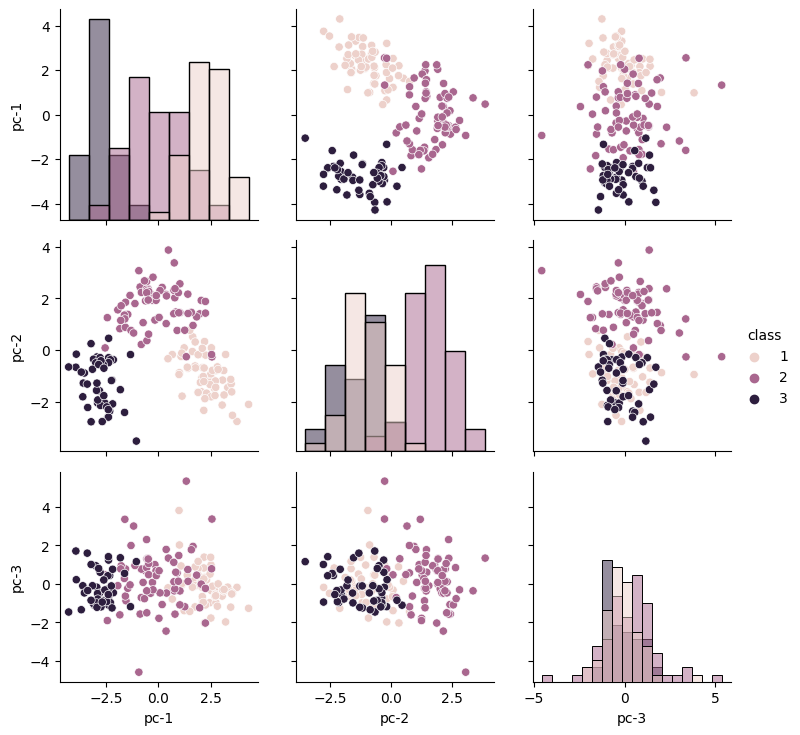

In [22]:
grid = sns.PairGrid(pcAttributesData, hue="class")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

Dekompozycja na 3 główne składowe lepiej odseparowuje klasy co może pomóc w poźniejszym działaniu algorytmu klasyfikującego.

<font size="6">GLASS</font>

In [23]:
glassData = pd.read_csv(
    "glass.data", names=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]
).reset_index()
glassData = glassData.drop("index", axis=1)
glassData.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  class
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0      1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0      1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0      1

<font size="5">Klasy</font>

W opisie zbioru możemy znaleść nazwy poszczegółnych klas

-- 1 building_windows_float_processed\
-- 2 building_windows_non_float_processed\
-- 3 vehicle_windows_float_processed\
-- 4 vehicle_windows_non_float_processed (none in this database)\
-- 5 containers\
-- 6 tableware\
-- 7 headlamps

class
1        70
2        76
3        17
5        13
6         9
7        29
dtype: int64


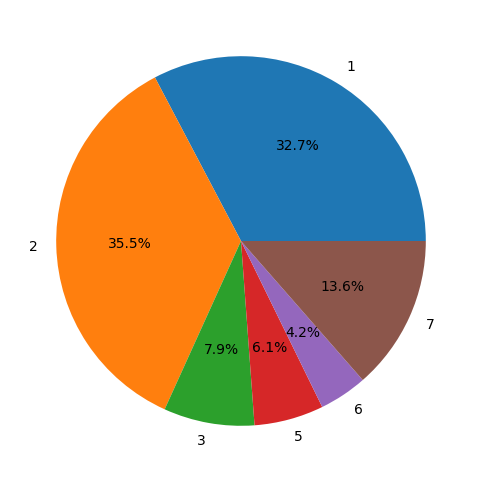

In [24]:
glassAttributes = glassData.loc[:, glassData.columns != "class"]
glassClasses = glassData.loc[:, glassData.columns == "class"]

glassClassesCount = glassClasses.value_counts().sort_index()

print(glassClassesCount)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor("white")
plt.pie(
    glassClassesCount,
    labels=glassClassesCount.index.get_level_values(0),
    autopct="%1.1f%%",
)
plt.show()

<font size="5">Atrybuty</font>


In [25]:
glassAttributes.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%      8.600000    0.000000    0.000000  
75%      9.172500    0.000000    0.100000  
max     16.190000    3.150000    0.510000

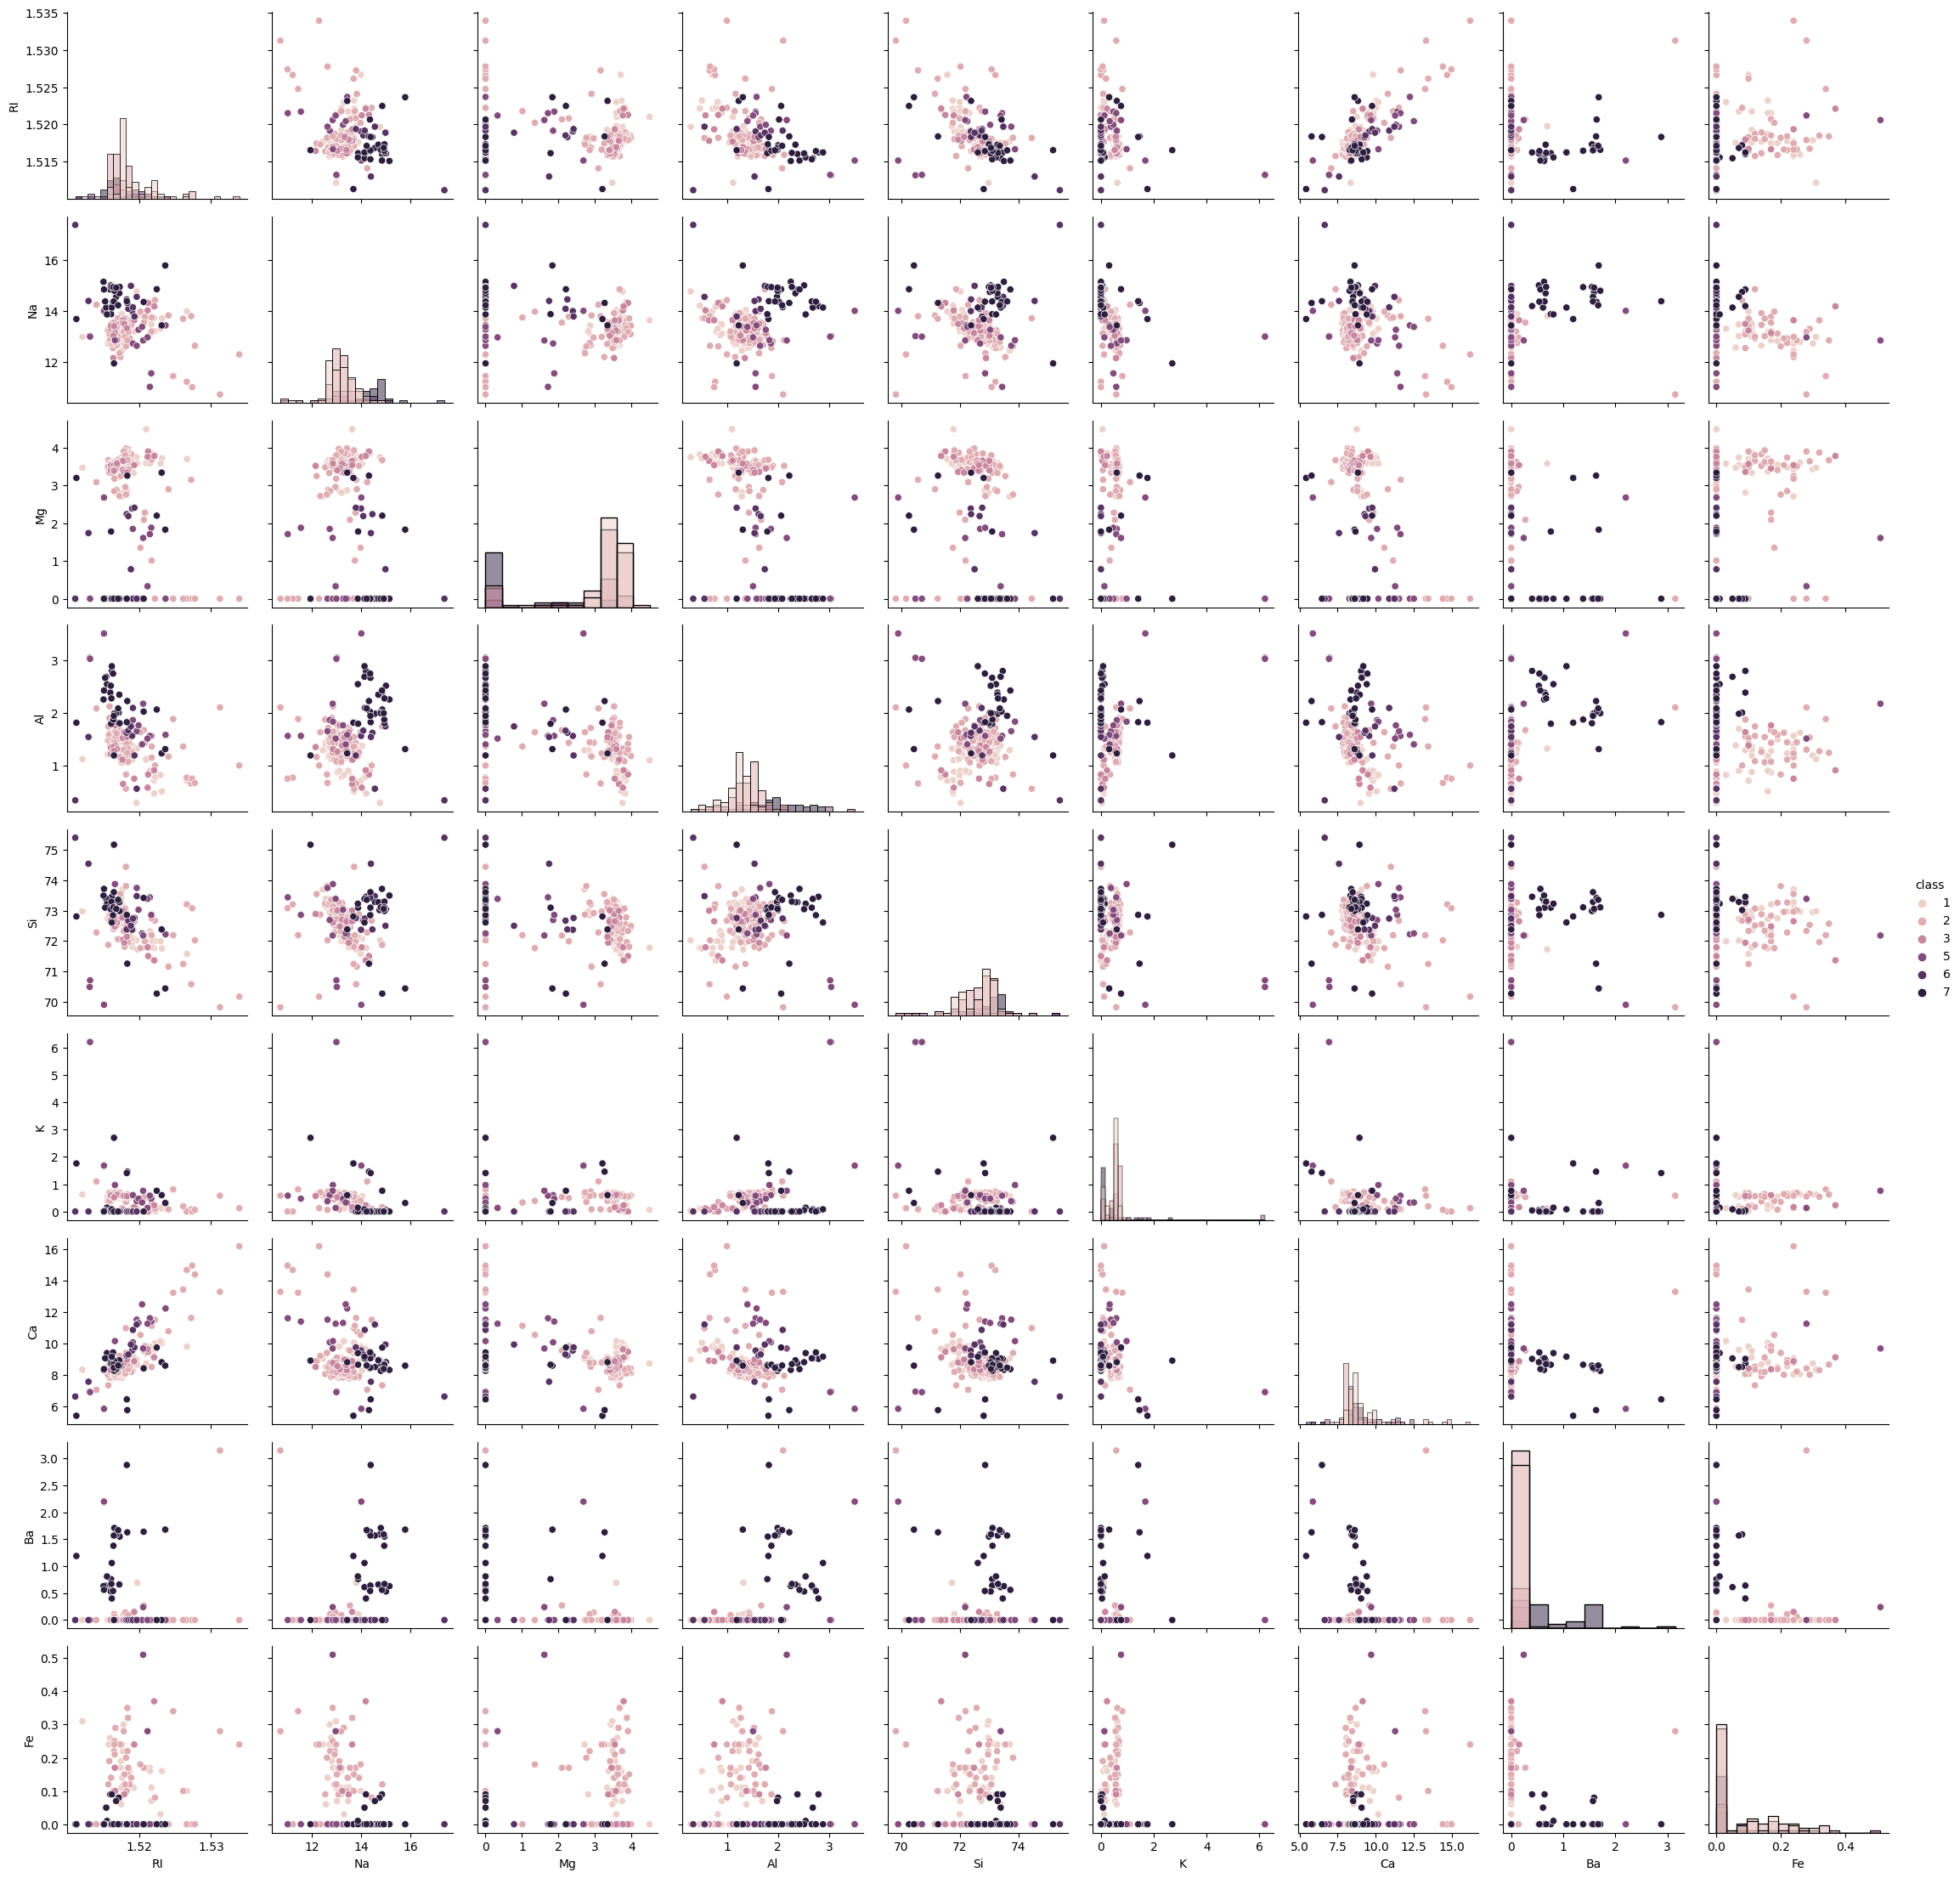

In [26]:
grid = sns.PairGrid(glassData, hue="class")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

Można zauważyć że jeden z rodzai szkieł ma więcej Baru niż pozstałe rodzaje. (Klasa7)

<font size="5">Wykres zależnośi Si/Ba</font>

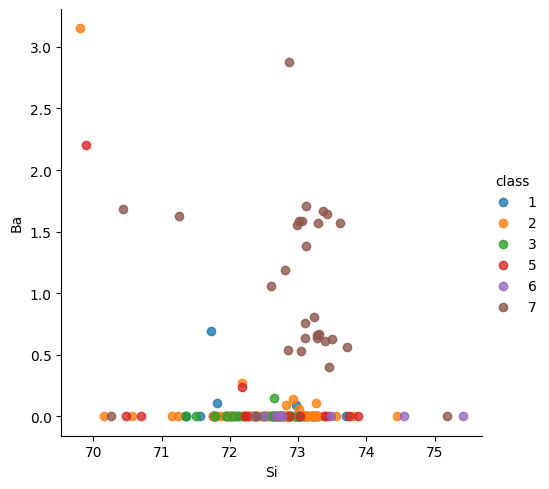

In [27]:
sns.lmplot(x="Si", y="Ba", data=glassData, hue="class", fit_reg=False)

<font size="5"> PCA</font>

In [28]:
standardizedAttributes = StandardScaler().fit_transform(glassAttributes)

pca = PCA(n_components=2)
pcAttributes = pca.fit_transform(standardizedAttributes)

pcAttributesData = pd.DataFrame(data=pcAttributes, columns=["pc-1", "pc-2"])
pcAttributesData = pd.concat([pcAttributesData, glassClasses], axis=1)

pcAttributesData.head()

pc-1      pc-2  class
0  1.151140 -0.529488      1
1 -0.574137 -0.759788      1
2 -0.940160 -0.929836      1
3 -0.142083 -0.961677      1
4 -0.351092 -1.091249      1

Projekcja na 2 główne składowe zachowuje 50.7% wariancji zbioru.

In [29]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27901819 0.2277858 ]
0.5068039901112689


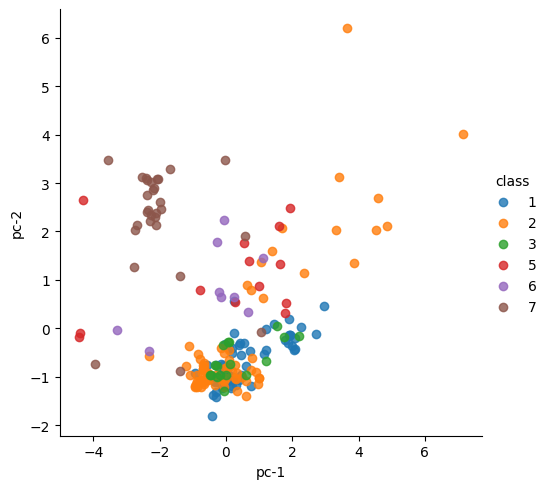

In [30]:
sns.lmplot(x="pc-1", y="pc-2", data=pcAttributesData, hue="class", fit_reg=False)

In [31]:
standardizedAttributes = StandardScaler().fit_transform(glassAttributes)

pca = PCA(n_components=3)
pcAttributes = pca.fit_transform(standardizedAttributes)

pcAttributesData = pd.DataFrame(data=pcAttributes, columns=["pc-1", "pc-2", "pc-3"])
pcAttributesData = pd.concat([pcAttributesData, glassClasses], axis=1)

pcAttributesData.head()

pc-1      pc-2      pc-3  class
0  1.151140 -0.529488 -0.372096      1
1 -0.574137 -0.759788 -0.556708      1
2 -0.940160 -0.929836 -0.554907      1
3 -0.142083 -0.961677 -0.117125      1
4 -0.351092 -1.091249 -0.485079      1

Projekcja na 3 główne składowe zachowuje 66.3% wariacji zbioru.

In [32]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27901819 0.2277858  0.15609378]
0.6628977672206734


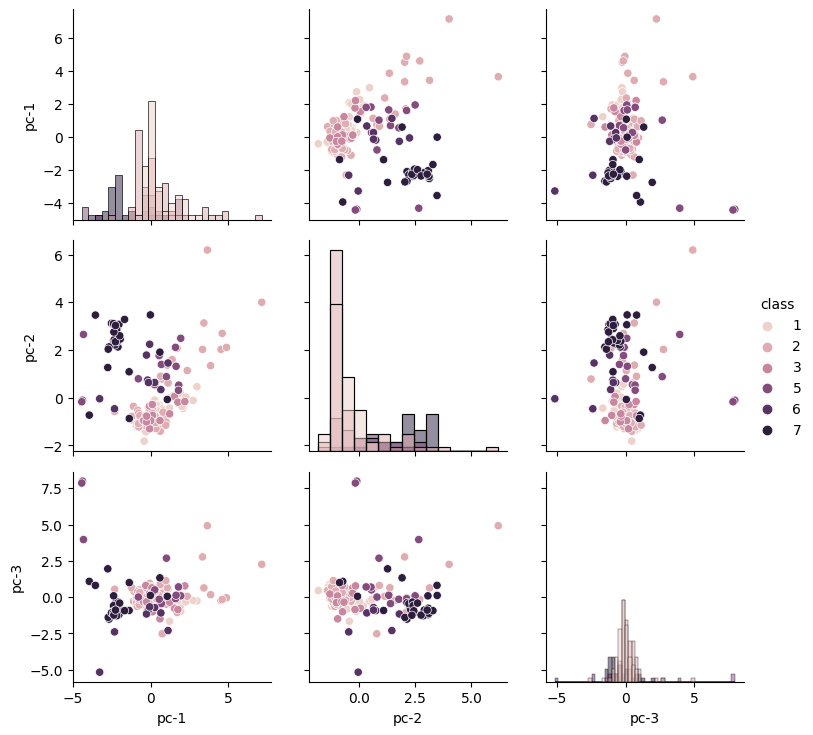

In [33]:
grid = sns.PairGrid(pcAttributesData, hue="class")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

Dekompozycja na 3 główne składowe lepiej odseparowuje klasy co może pomóc w poźniejszym działaniu algorytmu klasyfikującego.